In [1]:
import numpy as np
import scipy
from attention_graph_util import *
import seaborn as sns
import itertools 

import matplotlib as mpl
import matplotlib.pyplot as plt
rc={'font.size': 10, 'axes.labelsize': 10, 'legend.fontsize': 10.0, 
    'axes.titlesize': 32, 'xtick.labelsize': 20, 'ytick.labelsize': 16}
plt.rcParams.update(**rc)
mpl.rcParams['axes.linewidth'] = .5 #set the value globally

%matplotlib inline

def plot_attention_heatmap(att, s_position, t_positions, sentence):

  cls_att = np.flip(att[:,s_position, t_positions], axis=0)
  xticklb = input_tokens= list(itertools.compress(['<cls>']+sentence.split(), [i in t_positions for i in np.arange(len(sentence)+1)]))
  yticklb = [str(i) if i%2 ==0 else '' for i in np.arange(att.shape[0],0, -1)]
  ax = sns.heatmap(cls_att, xticklabels=xticklb, yticklabels=yticklb, cmap="YlOrRd")
  return ax


def convert_adjmat_tomats(adjmat, n_layers, l):
   mats = np.zeros((n_layers,l,l))
 
   for i in np.arange(n_layers):
       mats[i] = adjmat[(i+1)*l:(i+2)*l,i*l:(i+1)*l]
       
   return mats



In [2]:
a = np.arange(9).reshape(3,3)
print(a)

[[0 1 2]
 [3 4 5]
 [6 7 8]]


In [3]:
sma = scipy.special.softmax(a, axis=-1)
print(sma)

[[0.09003057 0.24472847 0.66524096]
 [0.09003057 0.24472847 0.66524096]
 [0.09003057 0.24472847 0.66524096]]


In [4]:
print(sma.sum(axis=-1))

[1. 1. 1.]


In [5]:
test_mat = np.random.rand(2,4,4,3,3)
tokens = ['one', 'two', 'three']

In [26]:
test_mat = scipy.special.softmax(test_mat, axis=-1)
print(test_mat)

[[[[[0.29843911 0.36225874 0.33930215]
    [0.36023754 0.32129449 0.31846797]
    [0.35743272 0.31654832 0.32601896]]

   [[0.33890286 0.36760834 0.2934888 ]
    [0.33096583 0.33333715 0.33569702]
    [0.34192578 0.32774255 0.33033167]]

   [[0.32423346 0.36638646 0.30938008]
    [0.36448275 0.34839245 0.28712479]
    [0.3699755  0.32265718 0.30736732]]

   [[0.35256964 0.32304845 0.32438191]
    [0.32476488 0.33745165 0.33778348]
    [0.33960896 0.30241239 0.35797865]]]


  [[[0.31002599 0.32090865 0.36906537]
    [0.31302199 0.32696202 0.36001598]
    [0.3372376  0.36953798 0.29322442]]

   [[0.29148209 0.36184495 0.34667297]
    [0.35762666 0.33923878 0.30313456]
    [0.32552969 0.292129   0.38234131]]

   [[0.31526309 0.36966763 0.31506928]
    [0.30014202 0.30347811 0.39637988]
    [0.32986855 0.32056329 0.34956816]]

   [[0.30969628 0.37156136 0.31874236]
    [0.34553845 0.32609116 0.32837039]
    [0.29983968 0.35358719 0.34657314]]]


  [[[0.33816358 0.31078004 0.35105638]
    [

In [27]:
res_att_mat = test_mat[0].mean(axis=1)
print(res_att_mat.shape)
print(res_att_mat)

(4, 3, 3)
[[[0.32853627 0.3548255  0.31663823]
  [0.34511275 0.33511893 0.31976832]
  [0.35223574 0.31734011 0.33042415]]

 [[0.30661686 0.35599565 0.33738749]
  [0.32908228 0.32394252 0.3469752 ]
  [0.32311888 0.33395437 0.34292676]]

 [[0.34363619 0.32123736 0.33512645]
  [0.33115954 0.33683991 0.33200055]
  [0.33977689 0.33467339 0.32554972]]

 [[0.3433056  0.34087695 0.31581745]
  [0.36875321 0.32065105 0.31059573]
  [0.32443152 0.35985912 0.31570936]]]


In [28]:
eye = np.expand_dims(np.eye(res_att_mat.shape[1]), axis=0)
print(eye)

[[[1. 0. 0.]
  [0. 1. 0.]
  [0. 0. 1.]]]


In [29]:
res_att_mat = res_att_mat + eye
print(res_att_mat.shape)
print(res_att_mat)

(4, 3, 3)
[[[1.32853627 0.3548255  0.31663823]
  [0.34511275 1.33511893 0.31976832]
  [0.35223574 0.31734011 1.33042415]]

 [[1.30661686 0.35599565 0.33738749]
  [0.32908228 1.32394252 0.3469752 ]
  [0.32311888 0.33395437 1.34292676]]

 [[1.34363619 0.32123736 0.33512645]
  [0.33115954 1.33683991 0.33200055]
  [0.33977689 0.33467339 1.32554972]]

 [[1.3433056  0.34087695 0.31581745]
  [0.36875321 1.32065105 0.31059573]
  [0.32443152 0.35985912 1.31570936]]]


In [30]:
avg = np.expand_dims(res_att_mat.sum(axis=-1), axis=-1)
print(avg.shape)
print(avg)

(4, 3, 1)
[[[2.]
  [2.]
  [2.]]

 [[2.]
  [2.]
  [2.]]

 [[2.]
  [2.]
  [2.]]

 [[2.]
  [2.]
  [2.]]]


In [31]:
res_att_mat = res_att_mat / avg
print(res_att_mat.shape)
print(res_att_mat)

(4, 3, 3)
[[[0.66426813 0.17741275 0.15831912]
  [0.17255637 0.66755947 0.15988416]
  [0.17611787 0.15867005 0.66521208]]

 [[0.65330843 0.17799782 0.16869375]
  [0.16454114 0.66197126 0.1734876 ]
  [0.16155944 0.16697718 0.67146338]]

 [[0.67181809 0.16061868 0.16756323]
  [0.16557977 0.66841995 0.16600027]
  [0.16988845 0.1673367  0.66277486]]

 [[0.6716528  0.17043848 0.15790872]
  [0.18437661 0.66032553 0.15529787]
  [0.16221576 0.17992956 0.65785468]]]


<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

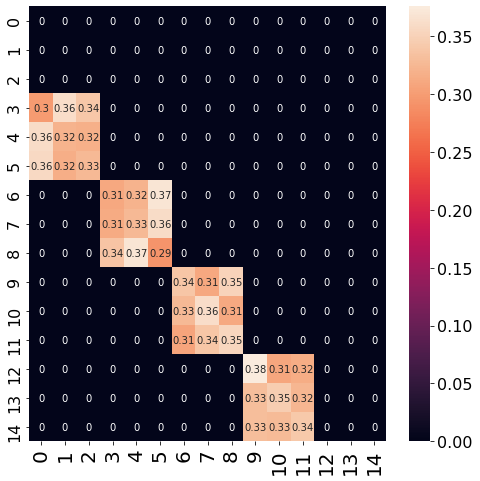

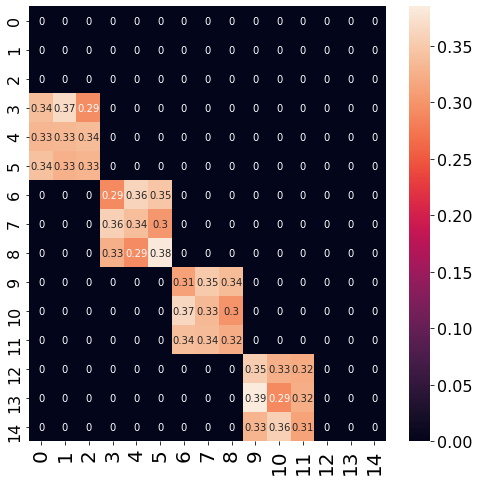

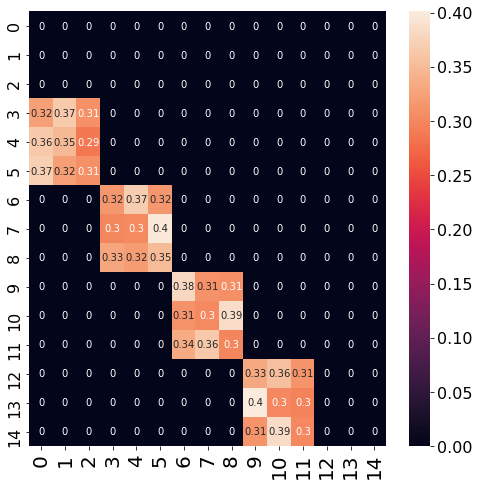

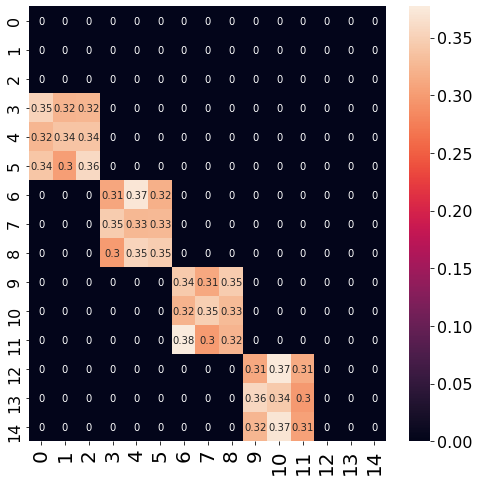

In [55]:
foo = test_mat[0]
for head in range(foo.shape[1]):
    foo_adj, foo_labels_to_index = get_adjmat(mat=foo[:,head], input_tokens=["one", "two", "three"])
    plt.figure(head+1,figsize=(8,8))
    display(sns.heatmap(foo_adj, annot=True))

<AxesSubplot:>

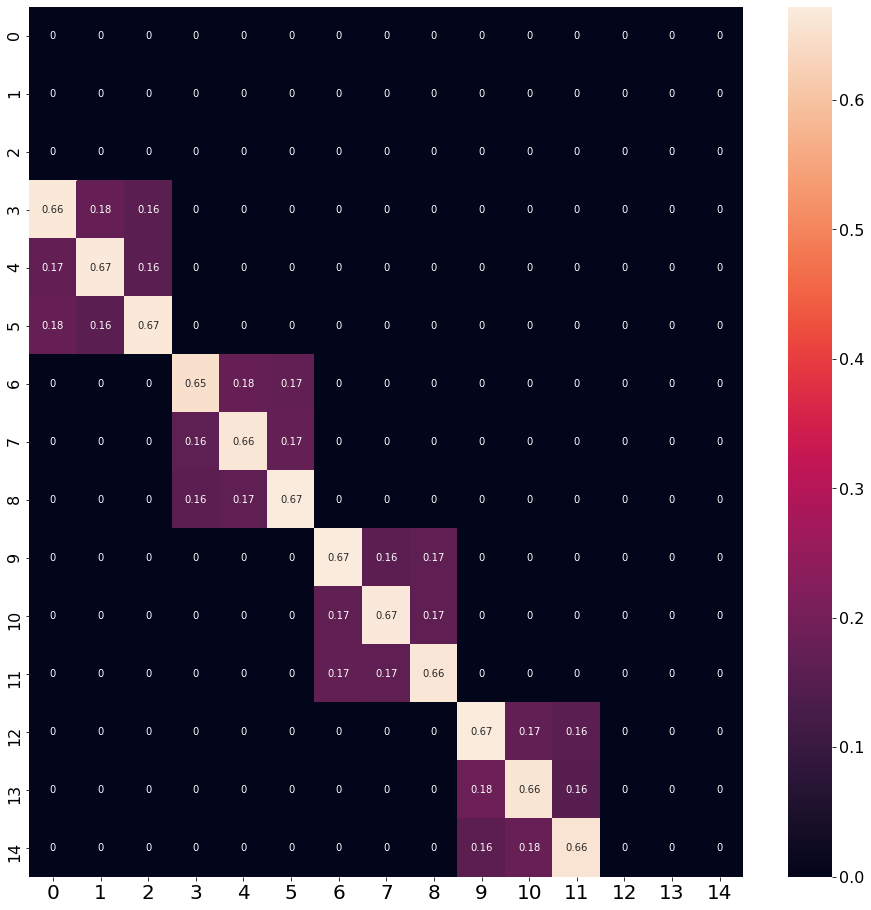

In [32]:
res_adj_mat, res_labels_to_index = get_adjmat(mat=res_att_mat, input_tokens=["one", "two", "three"])
plt.figure(1,figsize=(16,16))
display(sns.heatmap(res_adj_mat, annot=True))

In [47]:
print(res_labels_to_index)

{'0_one': 0, '1_two': 1, '2_three': 2, 'L1_0': 3, 'L1_1': 4, 'L1_2': 5, 'L2_0': 6, 'L2_1': 7, 'L2_2': 8, 'L3_0': 9, 'L3_1': 10, 'L3_2': 11, 'L4_0': 12, 'L4_1': 13, 'L4_2': 14}


{'0_one': 0, '1_two': 1, '2_three': 2, 'L1_0': 3, 'L1_1': 4, 'L1_2': 5, 'L2_0': 6, 'L2_1': 7, 'L2_2': 8, 'L3_0': 9, 'L3_1': 10, 'L3_2': 11, 'L4_0': 12, 'L4_1': 13, 'L4_2': 14}


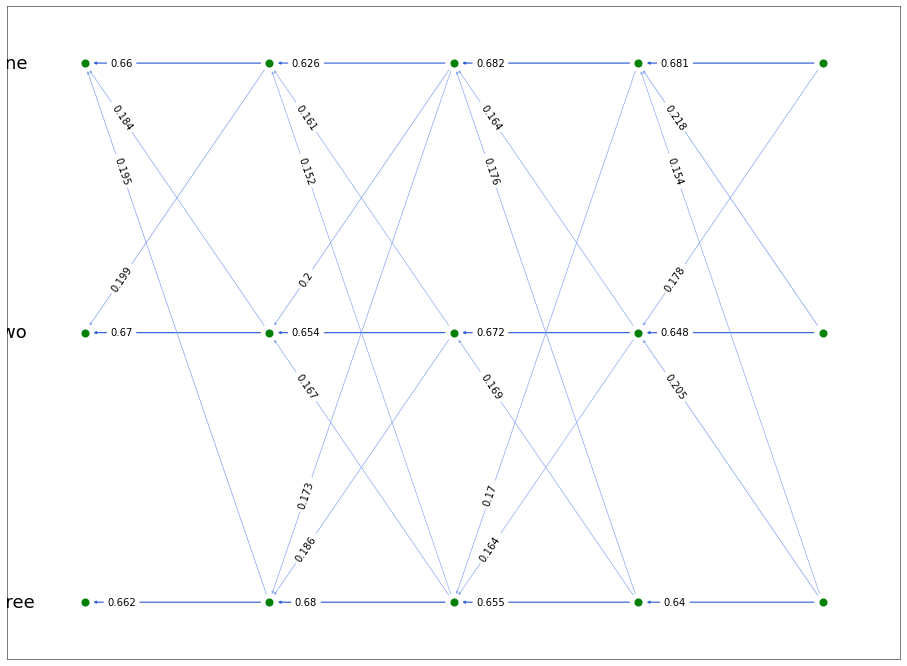

In [13]:
print(res_labels_to_index)
plt.figure(1,figsize=(16,12))

res_G = draw_attention_graph(
        res_adj_mat,
        res_labels_to_index,
        n_layers=res_att_mat.shape[0],
        length=res_att_mat.shape[-1],
        draw_edge_labels=True,
        limits=(0.15,1),
    )

In [33]:
test_mat.shape

(2, 4, 4, 3, 3)

In [16]:
res_att_mat.shape

(4, 3, 3)

(4, 3, 3) (4, 3, 3)
(1,) (0,)
(2,) (1,)
(3,) (2,)
(2, 4, 4, 3, 3) (2, 4, 4, 3, 3)
(slice(None, None, None), 1, slice(None, None, None)) (slice(None, None, None), 0, slice(None, None, None))
(slice(None, None, None), 2, slice(None, None, None)) (slice(None, None, None), 1, slice(None, None, None))
(slice(None, None, None), 3, slice(None, None, None)) (slice(None, None, None), 2, slice(None, None, None))


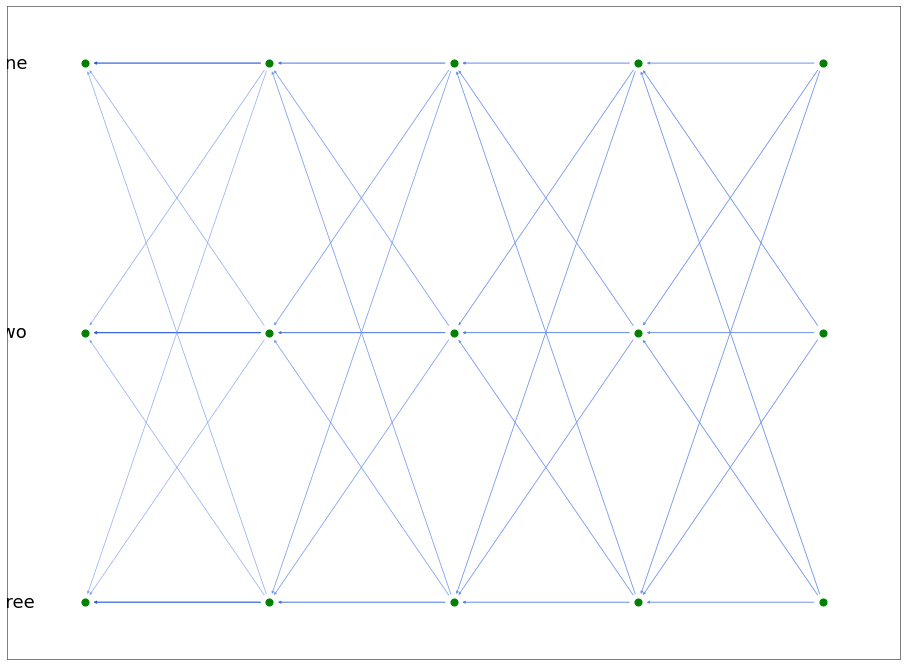

In [34]:
joint_attentions = compute_joint_attention(res_att_mat, add_residual=False)
joint_attentions2 = compute_joint_attention(test_mat, layer_dim=1, add_residual=True)
joint_att_adjmat, joint_labels_to_index = get_adjmat(mat=joint_attentions, input_tokens=tokens)
plt.figure(1,figsize=(16,12))

G = draw_attention_graph(
        joint_att_adjmat,
        joint_labels_to_index,
        n_layers=joint_attentions.shape[0],
        length=joint_attentions.shape[-1],
#        draw_edge_labels=True,
    )

In [35]:
joint_attentions2[0].shape

(4, 4, 3, 3)

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

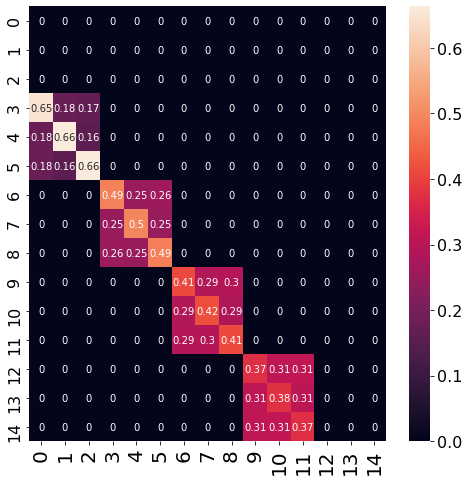

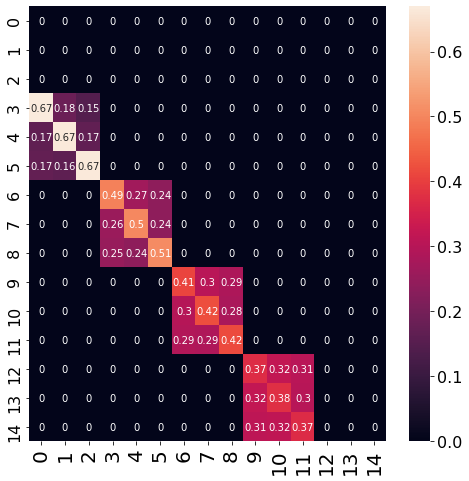

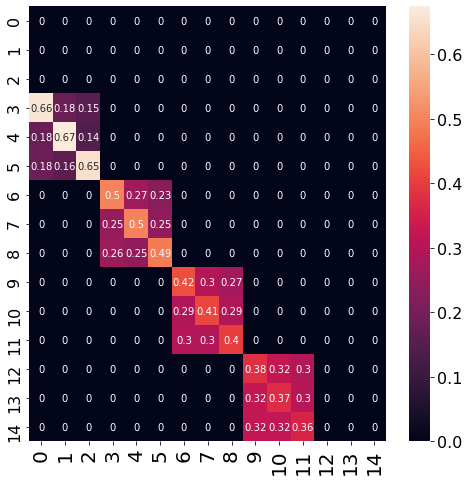

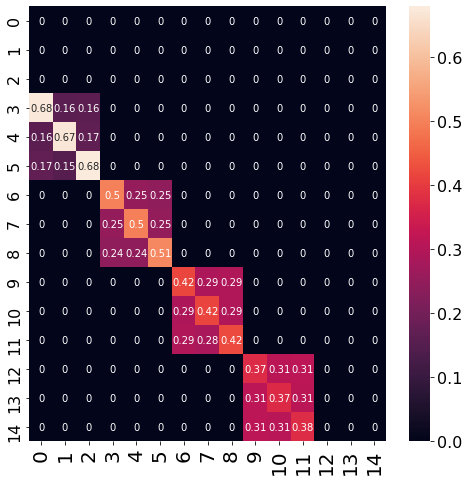

In [58]:
bar = joint_attentions2[0]
for head in range(bar.shape[1]):
    bar_adj, bar_labels_to_index = get_adjmat(mat=bar[:,head], input_tokens=["one", "two", "three"])
    plt.figure(head+1,figsize=(8,8))
    display(sns.heatmap(bar_adj, annot=True))

In [36]:
joint_attentions2[0].std(axis=1)

array([[[0.0100294 , 0.00922663, 0.00852274],
        [0.00872542, 0.00484715, 0.01014138],
        [0.00616157, 0.00474306, 0.00904945]],

       [[0.00516179, 0.00762776, 0.01005411],
        [0.00153715, 0.00347926, 0.00495094],
        [0.00711693, 0.00529213, 0.0108855 ]],

       [[0.00572781, 0.00644235, 0.00916186],
        [0.00291221, 0.0025799 , 0.00508051],
        [0.003469  , 0.00515567, 0.00754712]],

       [[0.00353155, 0.00463035, 0.0071313 ],
        [0.00380383, 0.00172793, 0.00403762],
        [0.00268018, 0.00399649, 0.00620985]]])

In [37]:
joint_attentions2[0].mean(axis=1)

array([[[0.66426813, 0.17741275, 0.15831912],
        [0.17255637, 0.66755947, 0.15988416],
        [0.17611787, 0.15867005, 0.66521208]],

       [[0.49433539, 0.26154337, 0.24412124],
        [0.25422604, 0.49856957, 0.2472044 ],
        [0.25431907, 0.24672319, 0.49895774]],

       [[0.41555971, 0.29719245, 0.28724784],
        [0.2940334 , 0.41752386, 0.28844274],
        [0.29513405, 0.29141856, 0.4134474 ]],

       [[0.37576642, 0.31677266, 0.30746092],
        [0.31660729, 0.37582187, 0.30757084],
        [0.31443735, 0.315035  , 0.37052765]]])

In [38]:
joint_attentions

array([[[0.66426813, 0.17741275, 0.15831912],
        [0.17255637, 0.66755947, 0.15988416],
        [0.17611787, 0.15867005, 0.66521208]],

       [[0.49439661, 0.26149602, 0.24410736],
        [0.25408106, 0.49862416, 0.24729477],
        [0.25438846, 0.24667103, 0.4989405 ]],

       [[0.41558091, 0.29709911, 0.28731998],
        [0.29392349, 0.41753625, 0.28854026],
        [0.29511164, 0.29135063, 0.41353773]],

       [[0.37582265, 0.3167185 , 0.30745885],
        [0.31653879, 0.3757341 , 0.30772711],
        [0.31443987, 0.31498765, 0.37057248]]])

In [57]:
np.isclose(joint_attentions2[0].mean(axis=1), joint_attentions, rtol=1e-5)

array([[[ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True]],

       [[False, False, False],
        [False, False, False],
        [False, False, False]],

       [[False, False, False],
        [False, False, False],
        [False, False, False]],

       [[False, False,  True],
        [False, False, False],
        [ True, False, False]]])

In [40]:
np.isclose?

In [54]:
#output_nodes = []
#input_nodes = []
#for key in res_labels_to_index:
#    if 'L24' in key:
#        output_nodes.append(key)
#    if res_labels_to_index[key] < test_mat.shape[-1]:
#        input_nodes.append(key)
#
#
#flow_values = compute_flows(res_G, res_labels_to_index, input_nodes, length=test_mat.shape[-1])
#plt.figure(1,figsize=(16,12))
#flow_G = draw_attention_graph(flow_values,res_labels_to_index, n_layers=test_mat.shape[0], length=test_mat.shape[-1])

In [20]:
#flow_att_mat = convert_adjmat_tomats(flow_values, n_layers=test_mat.shape[0], l=test_mat.shape[-1])
#
#plt.figure(1,figsize=(3,6))
#plot_attention_heatmap(flow_att_mat, src[ex_id], t_positions=targets[ex_id], sentence=sentence)
#plt.savefig('res_fat_bert_att_{}.png'.format(ex_id), format='png', transparent=True,dpi=360, bbox_inches='tight')

In [21]:
plt.figure(1,figsize=(3,6))
plot_attention_heatmap(joint_attentions, src[ex_id], t_positions=targets[ex_id], sentence=sentence)
plt.savefig('res_jat_bert_att_{}.png'.format(ex_id), format='png', transparent=True, dpi=360, bbox_inches='tight')

NameError: name 'src' is not defined

<Figure size 216x432 with 0 Axes>